In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# knn_100000 = pd.read_csv("../results/all_knn_static_v4_NO_100000.txt")
# knn_100000['num_queries'] = "100000"
# 
# knnd_100000 = pd.read_csv("../results/all_knn_dynamic_v5_NO_100000.txt")
# knnd_100000['num_queries'] = "100000d"
# 
# knn_100000 = pd.read_csv("../results/all_knn_static_v4_NO_100000.txt")
# knn_100000['num_queries'] = "100000"
# 
# knn_500000 = pd.read_csv("../results/all_knn_static_v4_NO_500000.txt")
# knn_500000['num_queries'] = "500000"
# 
# diff_ceil_250000 = pd.read_csv("../results/diff_formula_v4_NO_KNN_EXPIRE_2500000.txt")
# diff_ceil_250000['num_queries'] = "250000"
# diff_ceil_250000['name'] = "New (w/ ceil)"

diff_floor_250000 = pd.read_csv("../results/diff_floor_NO_KNN_EXPIRE_2500000.txt")
# diff_floor_250000['num_queries'] = "250000"
diff_floor_250000['name'] = "New (w/ floor)"

# diff_floor_1_250000 = pd.read_csv("../results/diff_floor_1_NO_KNN_EXPIRE_2500000.txt")
# diff_floor_1_250000['num_queries'] = "250000"
# diff_floor_1_250000['name'] = "New (w/ floor + 1)"

old_250000 = pd.read_csv("../results/old_NO_KNN_EXPIRE_2500000.txt")
# old_250000['num_queries'] = "250000"
old_250000['name'] = "Old"

diff_ceil_250000 = pd.read_csv("../results/diff_ceil_NO_KNN_EXPIRE_2500000.txt")
# diff_ceil_250000['num_queries'] = "250000"
diff_ceil_250000['name'] = "New (w/ ceil)"

res = pd.concat([
    # knn_100000,
    # diff_ceil_250000,
    diff_floor_250000,
    old_250000,
    diff_ceil_250000,
    # knn_500000,
    # knn_1000000
])
res['ar'] = res['ar'].apply(lambda x: x if x <= 512 else 512)

# res['name'] = res['num_queries'].apply(lambda x: "Descending (Continous)" if (x == "100000d") else "Descending (Once)")

res

,id,ar,currentLevel,x,y,name
0,879246,0.201128,8,135.112690,184.884263,New (w/ floor)
1,1316596,0.440350,8,241.776918,223.941533,New (w/ floor)
2,477029,2.577854,8,147.259401,148.797046,New (w/ floor)
3,1638491,27.752293,8,274.612763,194.181054,New (w/ floor)
4,361768,3.189804,7,262.402502,99.232595,New (w/ floor)
...,...,...,...,...,...,...
2245825,1941286,5.773728,8,262.371018,99.445252,New (w/ ceil)
2245826,2312716,1.678466,8,287.232273,218.067802,New (w/ ceil)
2245827,2094521,0.438078,8,244.428619,141.759426,New (w/ ceil)
2245828,492176,10.306239,8,148.954180,143.916998,New (w/ ceil)


## Location Distribution

In [43]:
# sns.scatterplot(x='x', y='y', data=res, hue='name', style=True, markers=['x'])

## Level Distribution

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='currentLevel', ylabel='count'>

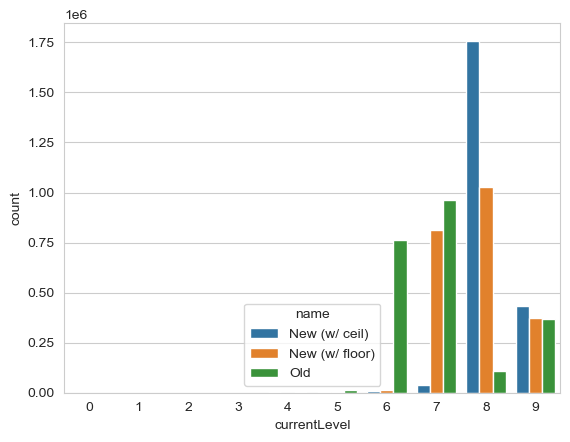

In [44]:
hist = res.value_counts(['name', 'currentLevel']).reset_index(name='count')
sns.barplot(x="currentLevel", y='count', hue='name', data=hist)

## Answer Region Distribution

In [45]:
sns.histplot(x="ar", hue='num_queries', data=res)

ValueError: Could not interpret value `num_queries` for parameter `hue`

In [ ]:
plt.figure(figsize=(24, 8))
sns.histplot(x="ar", hue='num_queries', data=res)
plt.ylim((0,500))
